## Problem 1 (Overfitting)

In [63]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem 2 (AIC and BIC)

In [57]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [64]:
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
y = np.array([0.050446, 0.098426, 0.33277, 0.7266, 1.0972, 1.5697, 1.8487, 2.5015])
x_label = np.linspace(0.2, 1.6, num=100)
n = len(x)

# degree = 1
equ_1 = np.polyfit(x, y, deg=1)
fit_y1 = np.polyval(equ_1, x)
rss1 = np.sum((fit_y1 - y) ** 2)
aic1 = n * math.log(rss1 / n) + 2 * 1
bic1 = n * math.log(rss1 / n) + math.log(n) * 1

# degree = 2
equ_2 = np.polyfit(x, y, deg=2)
fit_y2 = np.polyval(equ_2, x)
rss2 = np.sum((fit_y2 - y) ** 2)
aic2 = n * math.log(rss2 / n) + 2 * 2
bic2 = n * math.log(rss2 / n) + math.log(n) * 1

# degree = 3
equ_3 = np.polyfit(x, y, deg=3)
fit_y3 = np.polyval(equ_3, x)
rss3 = np.sum((fit_y3 - y) ** 2)
aic3 = n * math.log(rss3 / n) + 2 * 3
bic3 = n * math.log(rss3 / n) + math.log(n) * 1

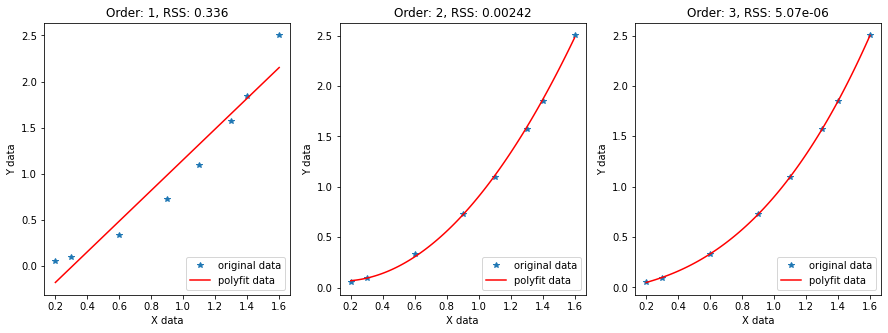

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(x, y, '*', label='original data')
plt.plot(x_label, np.polyval(equ_1,x_label), 'r', label='polyfit data')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(loc=4)
plt.title(f'Order: 1, RSS: {rss1:.3}')

plt.subplot(1,3,2)
plt.plot(x, y, '*', label='original data')
plt.plot(x_label, np.polyval(equ_2,x_label), 'r', label='polyfit data')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(loc=4)
plt.title(f'Order: 2, RSS: {rss2:.3}')

plt.subplot(1,3,3)
plt.plot(x, y, '*', label='original data')
plt.plot(x_label, np.polyval(equ_3,x_label), 'r', label='polyfit data')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(loc=4)
plt.title(f'Order: 3, RSS: {rss3:.3}')

plt.show()

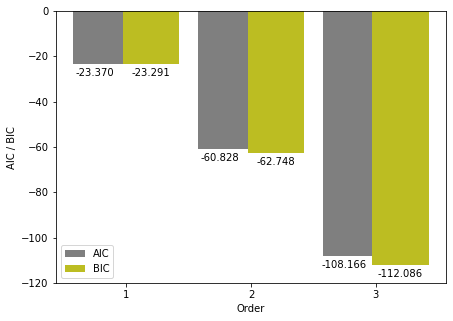

In [ ]:
x_aic = [0,1,2]
x_bic = [0.4,1.4,2.4]
aic = [aic1, aic2, aic3]
bic = [bic1, bic2, bic3]

plt.figure(figsize=(7,5))

plt.bar([0,1,2], [aic1,aic2,aic3], width=0.45, color='tab:gray', label='AIC')
plt.bar([0.4,1.4,2.4], [bic1,bic2,bic3], width=0.45, color='tab:olive', label='BIC')
plt.xlabel("Order")
plt.ylabel("AIC / BIC")
plt.ylim(-120)
plt.legend(loc=3)
plt.xticks([0.2,1.2,2.2],['1', '2', '3'])
for a, b in zip(x_aic, aic):
    plt.text(a-0.05, b-6, f"{b:.3f}", ha='center', va= 'bottom',fontsize=10)

for a, b in zip(x_bic, bic):
    plt.text(a, b-6, f"{b:.3f}", ha='center', va= 'bottom',fontsize=10)

plt.show()

AIC / BIC 分析。

無論是AIC或是BIC，該選擇的都是以越小效果表現越好，因此在此條件下應該選擇AIC與BIC數值都最小的order3 (aic= -108.166, bic= -112.086) 來做為這次分類所需的model。